## Final Project Submission

Please fill out:
* Student name: Ariadna Recasens
* Student pace: full time
* Scheduled project review date/time: 
* Instructor name: Hardik Idnani



## Project Overview

In this project, we help the non-for-profit Washinton Help People organization to find the most afforadable houses. 


### Business Problem
The non-for-profit Washinton Help People organization (WHPO) has recently received an anonymous donation to build the maximum number of houses for homeless people. Herein, WHPO wants to get some insights to find the cheapest houses so they can buy more houses to help more homelesses. In this project, we will use regression models to identify the factors that have a signficant impact in the house price. 

Some of the questions that we will consider are:

What are the zipcodes wehre the houses are most expensive?
What factors influecce houses price?



### The Data
This project uses the King County House Sales dataset. This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.

The dataset contains 21597 entries and 21 columns. This project will focus on the following variables:
* Price
* Zipcode
* Waterfront
* Grade
* Condition
* bedroomsNumber
* bathroomsNumber
* sqft_livingsquare
* sqft_lotsquare
* yr_built
* floorsTotal

We will investigate how those variables influence in the price of the houses



In [1]:
# import libraries needed for the project 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
# open the data file

data = pd.read_csv('./data/kc_house_data.csv')


## Data explorations

In [3]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

Let's deal with NaN data. From the data above, we know that there are 3842 rows with NaN values, which represents 17.7% of the total values. Since this correspond to a small percentage, we proceed to delete the rows that contain Nan values.


In [5]:

data = data.dropna()


From this first screening, we can see that sqft_basement is an object, so we convert it into float. But when we try to apply the function astype, it gives an error. That's why we have to epxlore the column a little further. By reading the corresponding error of astype and using the function .value_counts() we can see that the problem is that there is the sign "?". 


In [6]:

data['sqft_basement'].value_counts()

0.0       9362
?          333
600.0      155
500.0      151
700.0      148
          ... 
1008.0       1
4130.0       1
3500.0       1
666.0        1
4820.0       1
Name: sqft_basement, Length: 283, dtype: int64

To proceed with our analysis, we detete the rows that contain "?" 

In [7]:
data = data[(data.sqft_basement != '?' )]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15429 entries, 1 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             15429 non-null  int64  
 1   date           15429 non-null  object 
 2   price          15429 non-null  float64
 3   bedrooms       15429 non-null  int64  
 4   bathrooms      15429 non-null  float64
 5   sqft_living    15429 non-null  int64  
 6   sqft_lot       15429 non-null  int64  
 7   floors         15429 non-null  float64
 8   waterfront     15429 non-null  float64
 9   view           15429 non-null  float64
 10  condition      15429 non-null  int64  
 11  grade          15429 non-null  int64  
 12  sqft_above     15429 non-null  int64  
 13  sqft_basement  15429 non-null  object 
 14  yr_built       15429 non-null  int64  
 15  yr_renovated   15429 non-null  float64
 16  zipcode        15429 non-null  int64  
 17  lat            15429 non-null  float64
 18  long  

We can now proceed to convert sqft_basement into a float type

In [8]:
data['sqft_basement'] = data['sqft_basement'].astype(str).astype(float)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15429 entries, 1 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             15429 non-null  int64  
 1   date           15429 non-null  object 
 2   price          15429 non-null  float64
 3   bedrooms       15429 non-null  int64  
 4   bathrooms      15429 non-null  float64
 5   sqft_living    15429 non-null  int64  
 6   sqft_lot       15429 non-null  int64  
 7   floors         15429 non-null  float64
 8   waterfront     15429 non-null  float64
 9   view           15429 non-null  float64
 10  condition      15429 non-null  int64  
 11  grade          15429 non-null  int64  
 12  sqft_above     15429 non-null  int64  
 13  sqft_basement  15429 non-null  float64
 14  yr_built       15429 non-null  int64  
 15  yr_renovated   15429 non-null  float64
 16  zipcode        15429 non-null  int64  
 17  lat            15429 non-null  float64
 18  long  

Above we have confirm that the sqft_basement is now a float.

## CATEGORICAL VS CONTINUOUS DATA ANALYSIS

Now let's identify which variables are categorical and which ones are continuous. We will do it by plotting the data. From the graphs below, we can determine that waterfront, view, condition, grade, years built and renovated are categorical variables. 

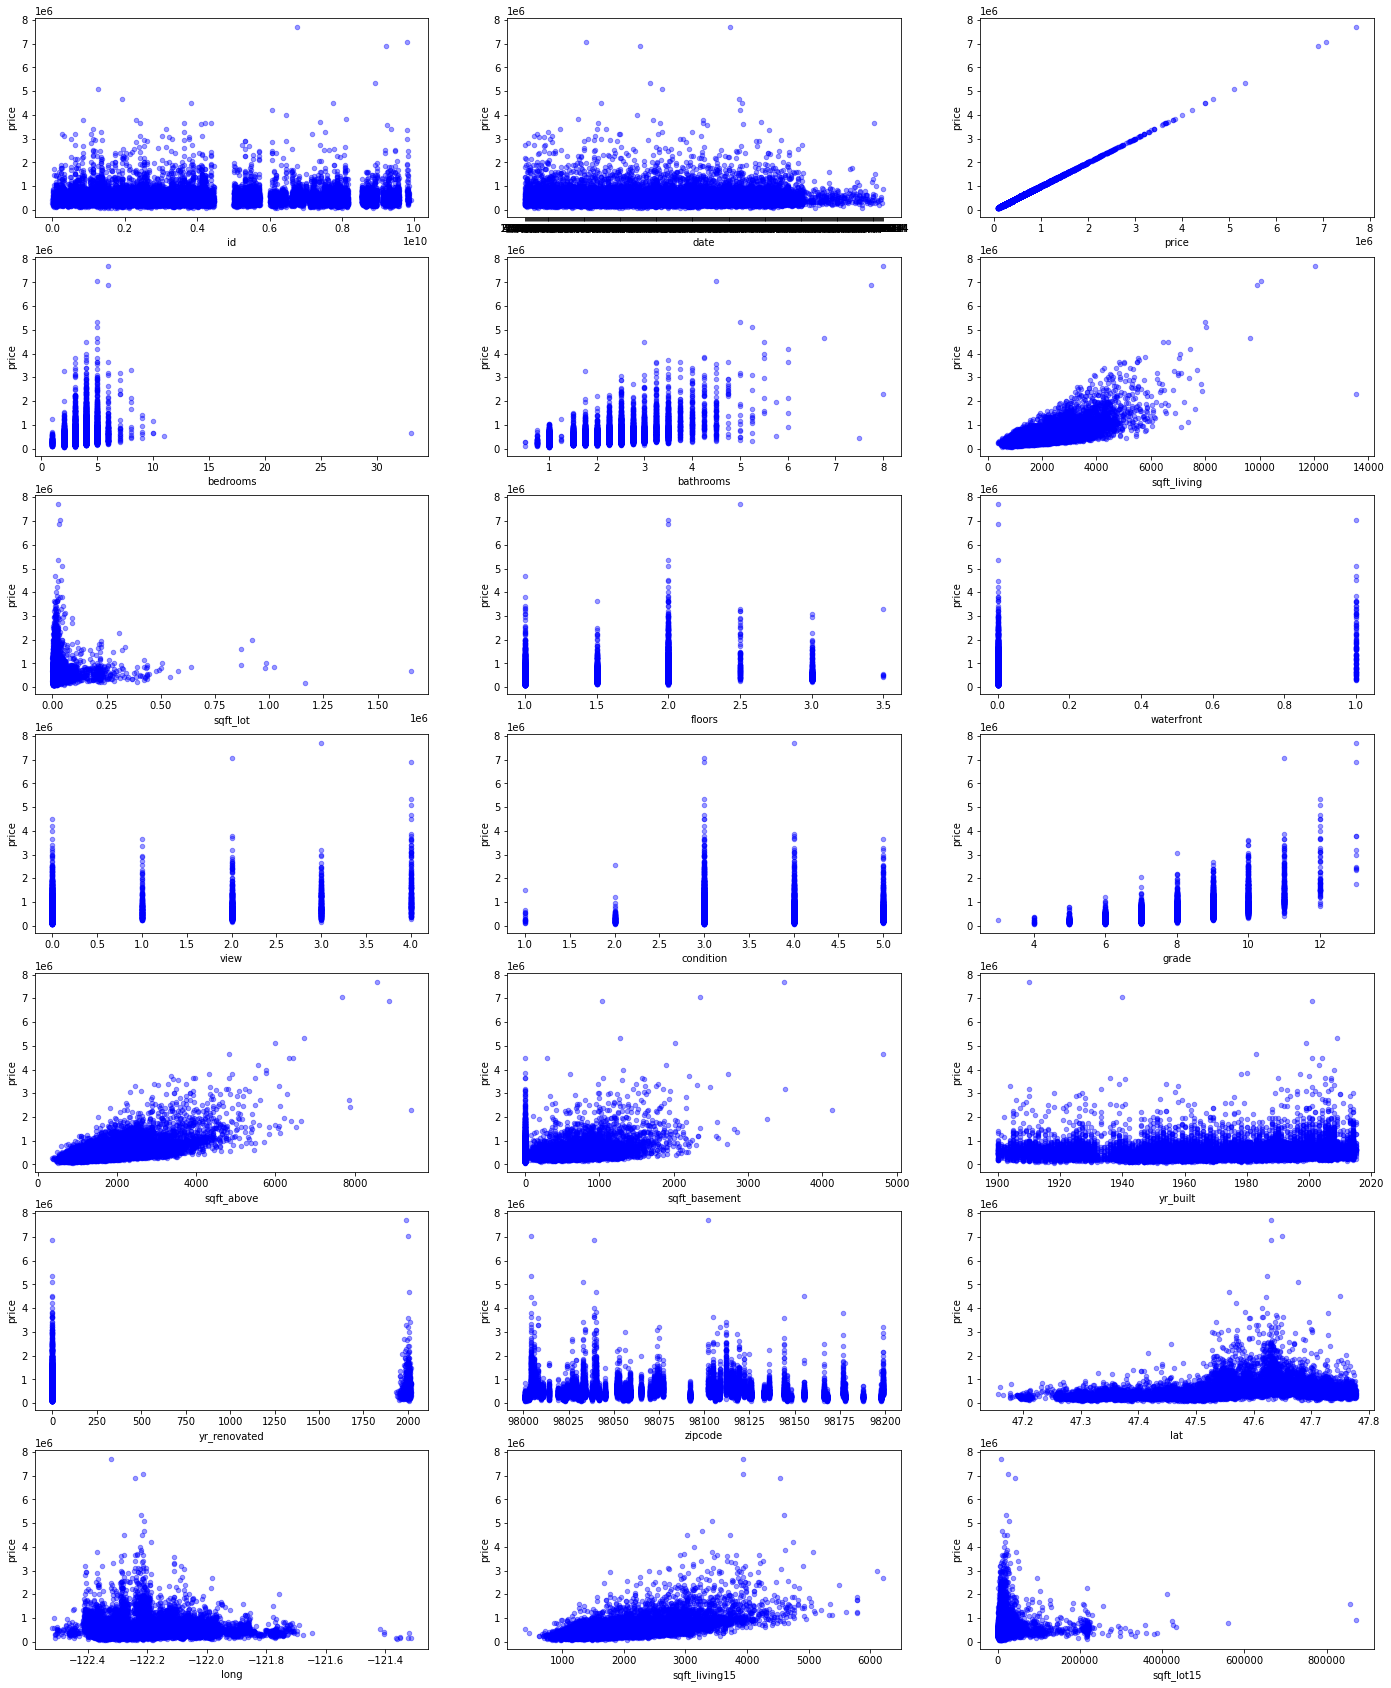

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

 # crate the figure and axes
fig, axes = plt.subplots(7, 3, figsize=(24, 30))   

# unpack all the axes subplots
axe = axes.ravel()

# assign the plot to each subplot in axe
for i, c in enumerate(data.columns):
    
    data.plot(kind='scatter', x=c, y='price', ax=axe[i], alpha=0.4, color='b')

We conver the "years_built" variable into a continous variable by calculating the years since it was renovated.

In [23]:
data_new['years_built'] = 2022 - data['yr_built']
data_new.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 14708 entries, 3 to 21596
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             14708 non-null  int64  
 1   date           14708 non-null  object 
 2   price          14708 non-null  float64
 3   bedrooms       14708 non-null  int64  
 4   bathrooms      14708 non-null  float64
 5   sqft_living    14708 non-null  int64  
 6   sqft_lot       14708 non-null  int64  
 7   floors         14708 non-null  float64
 8   waterfront     14708 non-null  float64
 9   view           14708 non-null  float64
 10  condition      14708 non-null  int64  
 11  grade          14708 non-null  int64  
 12  sqft_above     14708 non-null  int64  
 13  sqft_basement  14708 non-null  float64
 14  yr_built       14708 non-null  int64  
 15  yr_renovated   14708 non-null  float64
 16  zipcode        14708 non-null  int64  
 17  lat            14708 non-null  float64
 18  long  

## EFFECT OF RENOVATION ON PRICE 

We start our analysis determining the effect of renovation in house prices. Let's explore the data a bit further.

In [11]:
data.yr_renovated.value_counts()

0.0       14797
2014.0       61
2013.0       29
2005.0       27
2000.0       25
          ...  
1959.0        1
1976.0        1
1944.0        1
1974.0        1
1967.0        1
Name: yr_renovated, Length: 69, dtype: int64

From the data, we can observed that some years of renovation correspond to 0, which means that these houses have not been renovated. 
What we are going to do, is to create 2 grups, one of houses that have not been renovated and the other one of renovated houses. After that, we will perform a t-test to determine whether there is a significant change between these two groups. 


Hypothesis:
H0 = there are no differences between renovated and non-renovated houses
Ha = there are differences between renovated and non-renovated houses


In [12]:
no_renovated = data[data.yr_renovated == 0]['price']
renovated = data[data.yr_renovated != 0]['price']

# Calculate the 2-sided p-value for a t-test comparing the renovated vs no-renovated groups
from scipy import stats

stats.ttest_ind(no_renovated, renovated, equal_var=False)[1]


4.797932412475557e-18

The above result indicates that there is a signfincant difference between renovated and non-renovated houeses. Which one is more expensive? Let's see:

In [13]:
print(no_renovated.mean(), renovated.mean())

532194.4358991687 759316.8022151899


The renovated houses are more expensive. How much?  1.4-fold more expensive, as seen below. 

In [14]:
fold_increase = (renovated.mean()/no_renovated.mean())
fold_increase

1.4267657664107043

Based on this data, we select only the non-renovated houses, as our main is to find the cheapest houses for the WHPO.

In [16]:
data_new = data.drop(data[data.yr_renovated != 0].index)
data_new.yr_renovated.value_counts() #to confirm that we only selected the non-renovated

0.0    14797
Name: yr_renovated, dtype: int64

## EFFECTS OF WATERVIEW ON PRICE

To study the effect of waterviews on price, we performed the same analysis that with renovation: a t-test to compare houses with and without waterview 

In [18]:
no_water_view = data_new[data_new.waterfront == 0]['price']
water_view = data_new[data_new.waterfront != 0]['price']

# Calculate the 2-sided p-value for a t-test comparing the renovated vs no-renovated groups
from scipy import stats

stats.ttest_ind(water_view, no_water_view, equal_var=False)[1]

5.1010178385823954e-17

The t-test analysis confirm that there is a statistically signifcant differences between houses with and whithout waterview. 
Below we can see the average price for both groups.

In [19]:
print(water_view.mean(), no_water_view.mean())

1725217.97752809 524975.2969812347


Based on the data above, we select only the houses that do not have waterviews for our further analysis

In [20]:
data_new = data_new.drop(data_new[data_new.waterfront != 0].index)
data_new

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,...,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,...,7,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113
9,3793500160,3/12/2015,323000.0,3,2.50,1890,6560,2.0,0.0,0.0,...,7,1890,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,2997800021,2/19/2015,475000.0,3,2.50,1310,1294,2.0,0.0,0.0,...,8,1180,130.0,2008,0.0,98116,47.5773,-122.409,1330,1265
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007


In [21]:
data_new.waterfront.value_counts() #to confirm that we only have the houses without waterviews

0.0    14708
Name: waterfront, dtype: int64

## EFFECTS OF ZIPCODES ON PRICE

We want now to determine which are the zipcodes that are most expensive. Since zipcodes is a categorical variable, we will use get_dummies to work with tat.

In [25]:
zipcode_dummies = pd.get_dummies(data_new['zipcode'], prefix='zip', drop_first=True)

In [26]:
zipcode_analysis = data.drop(['zipcode'], axis=1)
zipcode_analysis = pd.concat([data_new['price'], zipcode_dummies], axis=1)
zipcode_analysis.head()




,price,zip_98002,zip_98003,zip_98004,zip_98005,zip_98006,zip_98007,zip_98008,zip_98010,zip_98011,...,zip_98146,zip_98148,zip_98155,zip_98166,zip_98168,zip_98177,zip_98178,zip_98188,zip_98198,zip_98199
3,604000.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,510000.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1230000.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,229500.0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
9,323000.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
X_zip = zipcode_analysis.drop('price', axis=1)
y_zip = zipcode_analysis['price']

import statsmodels.api as sm
X_zip_int = sm.add_constant(X_zip)
model = sm.OLS(y_zip,X_zip_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.460
Model:                            OLS   Adj. R-squared:                  0.457
Method:                 Least Squares   F-statistic:                     180.4
Date:                Sat, 04 Jun 2022   Prob (F-statistic):               0.00
Time:                        20:35:35   Log-Likelihood:            -2.0336e+05
No. Observations:               14708   AIC:                         4.069e+05
Df Residuals:                   14638   BIC:                         4.074e+05
Df Model:                          69                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.722e+05   1.57e+04     17.378      0.000    2.42e+05    3.03e+05
zip_98002  -3.797e+04   2.58e+04     -1.472      0.141   -8.86e+04    1.26e+04
zip_98003   1.628e+04    2.3e+04      0.709      0.479   -2.87e+04    6.13e+04
zip_98004   1.058e+06   2.32e+04     45.542      0.000    1.01e+06     1.1e+06
zip_98005   5.403e+05    2.7e+04     20.047      0.000    4.87e+05    5.93e+05
zip_98006   5.887e+05   2.06e+04     28.613      0.000    5.48e+05    6.29e+05
zip_98007    3.48e+05   2.94e+04     11.830      0.000     2.9e+05    4.06e+05
zip_98008   3.112e+05   2.34e+04     13.318      0.000    2.65e+05    3.57e+05
zip_98010   1.577e+05   3.58e+04      4.405      0.000    8.75e+04    2.28e+05
zip_98011   2.231e+05   2.64e+04      8.449      0.000    1.71e+05    2.75e+05
zip_98014   2.254e+05   3.03e+04      7.427      0.000    1.66e+05    2.85e+05
zip_98019   1.608e+05   2.72e+04      5.920      0.000    1.08e+05    2.14e+05
zip_98022   4.677e+04   2.51e+04      1.862      0.063   -2464.142     9.6e+04
zip_98023   1.348e+04   2.04e+04      0.662      0.508   -2.64e+04    5.34e+04
zip_98024   3.107e+05   3.69e+04      8.429      0.000    2.38e+05    3.83e+05
zip_98027   3.316e+05   2.13e+04     15.560      0.000     2.9e+05    3.73e+05
zip_98028    1.86e+05   2.33e+04      7.991      0.000     1.4e+05    2.32e+05
zip_98029    3.36e+05   2.23e+04     15.090      0.000    2.92e+05     3.8e+05
zip_98030   2.771e+04   2.41e+04      1.151      0.250   -1.95e+04    7.49e+04
zip_98031   2.813e+04   2.35e+04      1.197      0.231   -1.79e+04    7.42e+04
zip_98032  -1.919e+04   2.93e+04     -0.655      0.513   -7.66e+04    3.83e+04
zip_98033   5.002e+05   2.12e+04     23.600      0.000    4.59e+05    5.42e+05
zip_98034   2.273e+05   2.01e+04     11.330      0.000    1.88e+05    2.67e+05
zip_98038   9.153e+04   1.97e+04      4.639      0.000    5.29e+04     1.3e+05
zip_98039   1.963e+06   5.06e+04     38.818      0.000    1.86e+06    2.06e+06
zip_98040   8.278e+05   2.43e+04     34.108      0.000     7.8e+05    8.75e+05
zip_98042   4.246e+04   1.99e+04      2.133      0.033    3435.211    8.15e+04
zip_98045   1.603e+05   2.51e+04      6.382      0.000    1.11e+05     2.1e+05
zip_98052   3.723e+05   1.99e+04     18.717      0.000    3.33e+05    4.11e+05
zip_98053   3.933e+05   2.14e+04     18.409      0.000    3.51e+05    4.35e+05
zip_98055   3.178e+04   2.37e+04      1.339      0.181   -1.48e+04    7.83e+04
zip_98056   1.334e+05   2.12e+04      6.296      0.000    9.19e+04    1.75e+05
zip_98058   7.757e+04    2.1e+04      3.690      0.000    3.64e+04    1.19e+05
zip_98059   2.214e+05   2.09e+04     10.607      0.000     1.8e+05    2.62e+05
zip_98065   2.627e+05   2.29e+04     11.465      0.000    2.18e+05    3.08e+05
zip_98070   1.779e+05   3.34e+04      5.322      0.000    1.12e+05    2.43e+05
zi

The adjusted R-squared value for the whole mode is 0.457, which is a very low value. This means that only 45% of the price variability can be explained by zipcode. However, in this analysis we want to focus on particular zipcodes. 

From this analysis we can see that several zipocdes positively and signifcantly increase the price (coefient positive and p < 0.05), and some that do not. We also observe that even some of them have a negative correlation with price, they are not significant. 

We want to identify which ones are the ones that positively and signficnatly increase the price and which ones do not. 

In [29]:
columns = ['index','pvalue']

pvalue_positive_table = pd.DataFrame(columns=columns)
pvalue_negative_table = pd.DataFrame(columns=columns)


for i, a in enumerate(model.pvalues):
    if a < 0.05:
        pvalue_positive_table.loc[i] = [i,a]
    else:
        pvalue_negative_table.loc[i] = [i,a]




In [30]:
pvalue_positive_table

,index,pvalue
0,0.0,5.687576e-67
3,3.0,0.000000e+00
4,4.0,3.284568e-88
5,5.0,2.953096e-175
6,6.0,3.848512e-32
7,7.0,3.131388e-40
8,8.0,1.064186e-05
9,9.0,3.217853e-17
10,10.0,1.169170e-13
11,11.0,3.300076e-09


In [31]:
pvalue_negative_table

,index,pvalue
1,1.0,0.141143
2,2.0,0.478573
12,12.0,0.062621
13,13.0,0.507792
18,18.0,0.249747
19,19.0,0.231285
20,20.0,0.512688
30,30.0,0.180668
44,44.0,0.053399
61,61.0,0.734322


In [34]:
index = pvalue_negative_table.index
index

Int64Index([1, 2, 12, 13, 18, 19, 20, 30, 44, 61, 64, 66, 67, 68], dtype='int64')

In [35]:
zipcodes_of_interstet = []

for i in index:
    zipcodes_of_interstet.append(zipcode_analysis.columns[i])

zipcodes_of_interstet_name = []



Below, we can see the zipcodes of interset, which means, the zipcodes that do not signficnatly incrase the house prices. Herein, these zipcodes are the ones that will have the lowest house prices

In [36]:
for i in zipcodes_of_interstet:
     zipcodes_of_interstet_name.append(i[-5:])

zipcodes_of_interstet_name

['98002',
 '98003',
 '98022',
 '98023',
 '98030',
 '98031',
 '98032',
 '98055',
 '98106',
 '98148',
 '98168',
 '98178',
 '98188',
 '98198']

In [37]:
#just to refresh our data:

data_new

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,years_built
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,57
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,35
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,...,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930,21
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,...,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113,62
9,3793500160,3/12/2015,323000.0,3,2.50,1890,6560,2.0,0.0,0.0,...,1890,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,2997800021,2/19/2015,475000.0,3,2.50,1310,1294,2.0,0.0,0.0,...,1180,130.0,2008,0.0,98116,47.5773,-122.409,1330,1265,14
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509,13
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200,8
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007,13


In [38]:
#as mentioend above, now we want to select only the houses corresponding to our zipcodes of interest

data_new2 =  data_new[data_new['zipcode'].isin(zipcodes_of_interstet_name)]
data_new2.zipcode.value_counts()

98023    356
98106    216
98003    213
98031    196
98055    189
98198    186
98168    184
98030    180
98178    172
98022    156
98002    143
98032     98
98188     94
98148     40
Name: zipcode, dtype: int64

## EFFECTS OF CONDITION ON PRICE

Condition is also a categorical variable, and we will apply get_dummies to deal with it. 

In [41]:
condition_dummies = pd.get_dummies(data_new2['condition'], prefix='cond', drop_first=True)

In [42]:
condition_analysis = data_new2.drop(['condition'], axis=1)
condition_analysis = pd.concat([data_new2['price'], condition_dummies], axis=1)
condition_analysis.head(10)


,price,cond_2,cond_3,cond_4,cond_5
19,230000.0,0,0,1,0
24,329000.0,0,0,1,0
25,233000.0,0,0,0,1
46,210490.0,0,1,0,0
50,228000.0,0,1,0,0
61,289000.0,0,1,0,0
90,243500.0,0,1,0,0
92,153000.0,0,1,0,0
96,247500.0,0,1,0,0
97,199000.0,0,0,1,0


In [43]:
X_cond = condition_analysis.drop('price', axis=1)
y_cond = condition_analysis['price']

X_cond_int = sm.add_constant(X_cond)
model_cond = sm.OLS(y_cond,X_cond_int).fit()
model_cond.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     9.121
Date:                Sat, 04 Jun 2022   Prob (F-statistic):           2.60e-07
Time:                        20:41:30   Log-Likelihood:                -31281.
No. Observations:                2423   AIC:                         6.257e+04
Df Residuals:                    2418   BIC:                         6.260e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.277e+05   6.93e+04      1.845      0.065   -8060.661    2.64e+05
cond_2       1.06e+05    7.2e+04      1.472      0.141   -3.52e+04    2.47e+05
cond_3      1.681e+05   6.93e+04      2.426      0.015    3.22e+04    3.04e+05
cond_4      1.478e+05   6.93e+04      2.132      0.033    1.18e+04    2.84e+05
cond_5      1.498e+05   6.98e+04      2.147      0.032     1.3e+04    2.87e+05
==============================================================================
Omnibus:                     1343.480   Durbin-Watson:                   1.938
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            20903.391
Skew:                           2.279   Prob(JB):                         0.00
Kurtosis:                      16.648   Cond. No.                         96.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The adjusted R2-value is very low. However, we have performed this analysis to focus on the value of each condition individually. 

Similar to zipcodes, there are some conditoins that signicnatly and positively increase the house price. We perform the same analysis to udnerstand which conditions impact the price and which ones do not. 

In [53]:
columns = ['index','pvalue']

condition_pvalue_positive_table = pd.DataFrame(columns=columns)
condition_pvalue_negative_table = pd.DataFrame(columns=columns)


for i, a in enumerate(model_cond.pvalues):
    if a < 0.05:
        condition_pvalue_positive_table.loc[i] = [i,a]
    else:
        condition_pvalue_negative_table.loc[i] = [i,a]


condition_pvalue_positive_table

,index,pvalue
2,2.0,0.015334
3,3.0,0.033129
4,4.0,0.031926


In [46]:
condition_pvalue_negative_table

,index,pvalue
0,0.0,0.065224
1,1.0,0.141052


In [47]:
cond_grade = condition_pvalue_negative_table.index
cond_grade

Int64Index([0, 1], dtype='int64')

In [48]:
cond_of_interstet = []

for i in cond_grade:
    cond_of_interstet.append(condition_analysis.columns[i])

cond_of_interstet

['price', 'cond_2']

In [49]:
cond_grade_negative = condition_pvalue_positive_table.index
cond_grade_negative

cond_no_interstet = []

for i in cond_grade_negative:
    cond_no_interstet.append(condition_analysis.columns[i])

cond_no_interstet

['cond_3', 'cond_4', 'cond_5']

In [50]:
data_new2.condition.value_counts()


3    1504
4     757
5     135
2      25
1       2
Name: condition, dtype: int64

From all the analysis above, we can conclude that condition 3 and above signficnatly increase the price of the houses. However, we can't filter our data only based on condition 1 and 2, because this only correspond to 27 datapoints. We will proceed with the analysis without this filter, but this is an insight that we will give to our clients.

## EFFECTS OF GRADE ON PRICE

Grade is also a categorical variable, and we will apply get_dummies to deal with it. 

In [51]:
grade_dummies = pd.get_dummies(data_new2['grade'], prefix='grd', drop_first=True)

grade_analysis = data_new2.drop(['grade'], axis=1)
grade_analysis = pd.concat([data_new2['price'], grade_dummies], axis=1)
grade_analysis.head(10)

,price,grd_4,grd_5,grd_6,grd_7,grd_8,grd_9,grd_10,grd_11
19,230000.0,0,0,0,1,0,0,0,0
24,329000.0,0,0,0,0,1,0,0,0
25,233000.0,0,0,1,0,0,0,0,0
46,210490.0,0,0,1,0,0,0,0,0
50,228000.0,0,0,0,1,0,0,0,0
61,289000.0,0,0,0,1,0,0,0,0
90,243500.0,0,0,0,1,0,0,0,0
92,153000.0,0,0,0,1,0,0,0,0
96,247500.0,0,0,0,1,0,0,0,0
97,199000.0,0,0,0,1,0,0,0,0


In [52]:
X_grade = grade_analysis.drop('price', axis=1)
y_grade = grade_analysis['price']

X_grade_int = sm.add_constant(X_grade)
model_grade = sm.OLS(y_grade,X_grade_int).fit()
model_grade.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.433
Model:                            OLS   Adj. R-squared:                  0.431
Method:                 Least Squares   F-statistic:                     230.3
Date:                Sat, 04 Jun 2022   Prob (F-statistic):          1.21e-290
Time:                        20:44:43   Log-Likelihood:                -30612.
No. Observations:                2423   AIC:                         6.124e+04
Df Residuals:                    2414   BIC:                         6.129e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        2.62e+05   7.44e+04      3.523      0.000    1.16e+05    4.08e+05
grd_4      -1.177e+05   7.95e+04     -1.480      0.139   -2.74e+05    3.82e+04
grd_5      -6.295e+04   7.52e+04     -0.837      0.403    -2.1e+05    8.46e+04
grd_6      -3.436e+04   7.45e+04     -0.461      0.645    -1.8e+05    1.12e+05
grd_7       7255.2670   7.44e+04      0.098      0.922   -1.39e+05    1.53e+05
grd_8       6.654e+04   7.44e+04      0.894      0.372   -7.94e+04    2.13e+05
grd_9       1.764e+05   7.47e+04      2.361      0.018    2.99e+04    3.23e+05
grd_10      2.848e+05   7.54e+04      3.778      0.000    1.37e+05    4.33e+05
grd_11      5.088e+05   7.89e+04      6.449      0.000    3.54e+05    6.63e+05
==============================================================================
Omnibus:                      890.827   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6474.541
Skew:                           1.550   Prob(JB):                         0.00
Kurtosis:                      10.384   Cond. No.                         174.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Similar to condition, the adjusted R2-value is very low. However, we have performed this analysis to focus on the value of each grade indivually. 

Similar to grade, there are some grades that signficantly and positively increase the house price. We perform the same analysis to understand which grades impact the price and which ones do not. 

In [59]:
columns = ['index','pvalue']

grade_pvalue_positive_table = pd.DataFrame(columns=columns)
grade_pvalue_negative_table = pd.DataFrame(columns=columns)


for i, a in enumerate(model_grade.pvalues):
    if a < 0.05:
        grade_pvalue_positive_table.loc[i] = [i,a]
    else:
        grade_pvalue_negative_table.loc[i] = [i,a]


grade_pvalue_positive_table

,index,pvalue
0,0.0,4.352885e-04
6,6.0,1.829279e-02
7,7.0,1.619382e-04
8,8.0,1.355940e-10


In [60]:
grade_pvalue_negative_table

,index,pvalue
1,1.0,0.138884
2,2.0,0.402833
3,3.0,0.644596
4,4.0,0.922330
5,5.0,0.371519


In [61]:
index_grade = grade_pvalue_negative_table.index
index_grade

Int64Index([1, 2, 3, 4, 5], dtype='int64')

In [62]:
grade_analysis

,price,grd_4,grd_5,grd_6,grd_7,grd_8,grd_9,grd_10,grd_11
19,230000.0,0,0,0,1,0,0,0,0
24,329000.0,0,0,0,0,1,0,0,0
25,233000.0,0,0,1,0,0,0,0,0
46,210490.0,0,0,1,0,0,0,0,0
50,228000.0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...
21538,388000.0,0,0,0,0,1,0,0,0
21543,305000.0,0,0,0,1,0,0,0,0
21546,422000.0,0,0,0,0,0,0,1,0
21554,330000.0,0,0,0,1,0,0,0,0


In [63]:
grade_of_interstet = []

for i in index_grade:
    grade_of_interstet.append(grade_analysis.columns[i])

grade_of_interstet

['grd_4', 'grd_5', 'grd_6', 'grd_7', 'grd_8']

In [64]:
index_grade_pos = grade_pvalue_positive_table.index

grade_no_interstet = []

for i in index_grade_pos:
    grade_no_interstet.append(grade_analysis.columns[i])

grade_no_interstet

['price', 'grd_9', 'grd_10', 'grd_11']

From the analysis above, we can determine that grade 9 and above significantly increase the house price, and therefore we  select only the houses with grade bewlow 9, as they are the cheaper ones. 

In [65]:
     
grade_of_interstet_name = []

for i in grade_of_interstet:
     grade_of_interstet_name.append(i[-1:])

grade_of_interstet_name

['4', '5', '6', '7', '8']

In [67]:
# we select houses below grade 9
data_new3 =  data_new2[data_new2['grade'].isin(grade_of_interstet_name)]

data_new3.grade.value_counts()

7    1277
8     536
6     400
5      43
4       7
Name: grade, dtype: int64

Now that we have selected the houses with the lowest price, we want to determine how several continuous variables affect the price of the selected houses. 


## EFFECTS OF #BEDROOMS, #BATHROOMS, #FLOORS, YEARS SINCE BUILT, SQFT LIVING AREA AND SQFT LIVING LOT ON PRICE 

In [68]:
data_new3.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'years_built'],
      dtype='object')

In [70]:
#We focus on the following variables, which are continuous variables:

continuous_norm = ['price','bedrooms', 'bathrooms', 'sqft_living','sqft_lot', 'years_built', 'floors']


Let's see if these variables follow a normal distribution

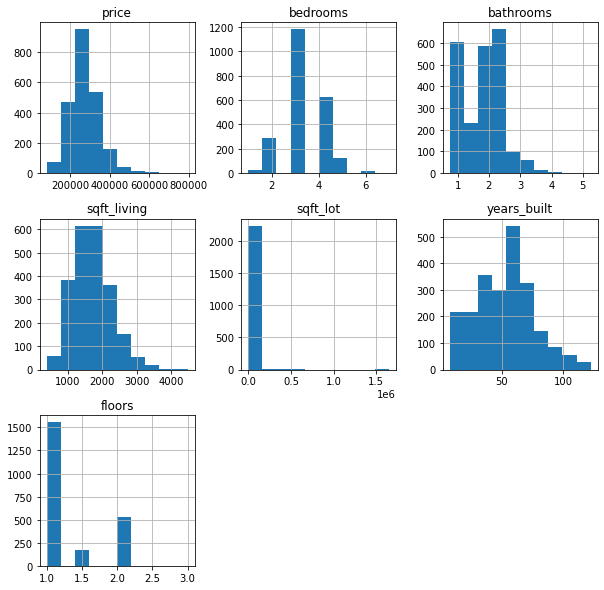

In [72]:

import warnings
warnings.filterwarnings('ignore')
fig = plt.figure(figsize = (10,10))
ax = fig.gca()
data_new3[continuous_norm].hist(ax = ax);

We try to improve the distribution by logaritmic transformation and normalization

In [73]:


# Log transform and normalize
data_cont = data_new3[continuous_norm]

# log features
log_names = [f'{column}_log' for column in data_cont.columns]
data_log = np.log(data_cont)
data_log.columns = log_names
# normalize (subract mean and divide by std)
def normalize(feature):
    return (feature - feature.mean()) / feature.std()

data_log_norm = data_log.apply(normalize)

data_log_norm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2263 entries, 19 to 21559
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price_log        2263 non-null   float64
 1   bedrooms_log     2263 non-null   float64
 2   bathrooms_log    2263 non-null   float64
 3   sqft_living_log  2263 non-null   float64
 4   sqft_lot_log     2263 non-null   float64
 5   years_built_log  2263 non-null   float64
 6   floors_log       2263 non-null   float64
dtypes: float64(7)
memory usage: 141.4 KB


Let's visualize the changes in the distribution:

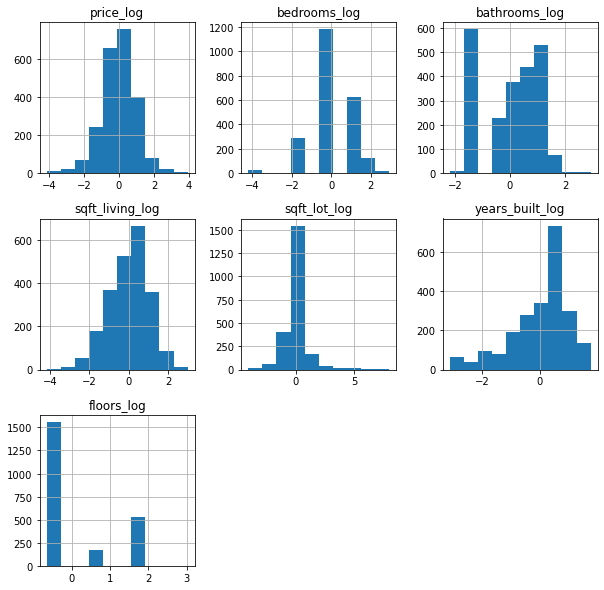

In [74]:
warnings.filterwarnings('ignore')
fig = plt.figure(figsize = (10,10))
ax = fig.gca()
data_log_norm.hist(ax = ax);

In [75]:
#let's confirm the data that we have

data_log_norm

,price_log,bedrooms_log,bathrooms_log,sqft_living_log,sqft_lot_log,years_built_log,floors_log
19,-0.488025,-0.180464,-1.429503,-0.711893,0.218967,0.259349,-0.652904
24,0.784583,-0.180464,0.703372,1.236653,-0.400289,-0.382058,1.665938
25,-0.441955,-0.180464,0.393584,0.195428,-0.893476,1.016381,0.703532
46,-0.803143,-0.180464,-1.429503,-1.387119,0.011947,0.357619,-0.652904
50,-0.519073,-0.180464,-1.429503,-0.854326,0.126925,0.677705,-0.652904
...,...,...,...,...,...,...,...
21534,-0.205853,-0.180464,0.393584,-0.688821,-3.063010,-2.547047,1.665938
21538,1.370969,-0.180464,0.980487,0.922370,-0.466645,-2.391750,1.665938
21543,0.515307,-1.668064,0.980487,-0.015251,-1.758931,-2.248891,1.665938
21554,0.795372,-0.180464,0.980487,-0.282135,-0.796149,-1.993486,-0.652904


Now we create a regression model with these variables:

In [89]:
X_new = data_log_norm.drop('price_log', axis=1)
y_new = data_log_norm['price_log']

import statsmodels.api as sm
X_new_int = sm.add_constant(X_new)
model_new = sm.OLS(y_new,X_new_int).fit()
model_new.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.456
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     314.8
Date:                Sat, 04 Jun 2022   Prob (F-statistic):          1.32e-293
Time:                        20:59:37   Log-Likelihood:                -2522.3
No. Observations:                2263   AIC:                             5059.
Df Residuals:                    2256   BIC:                             5099.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -8.205e-16      0.016  -5.28e-14      1.000      -0.030       0.030
bedrooms_log       -0.0471      0.020     -2.341      0.019      -0.087      -0.008
bathrooms_log       0.1277      0.026      4.866      0.000       0.076       0.179
sqft_living_log     0.5156      0.026     19.795      0.000       0.465       0.567
sqft_lot_log        0.1421      0.017      8.363      0.000       0.109       0.175
years_built_log    -0.0974      0.022     -4.415      0.000      -0.141      -0.054
floors_log          0.0571      0.019      2.992      0.003       0.020       0.095
==============================================================================
Omnibus:                      121.006   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              409.389
Skew:                           0.158   Prob(JB):                     1.27e-89
Kurtosis:                       5.060   Cond. No.                         3.68
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The adjusted R2_values of our module is very low. To try to improve, let's check the colinearility of the variables:

In [84]:
data_log_norm.corr()
abs(data_log_norm.corr()) > 0.75

# save absolute value of correlation matrix as a data frame
# converts all values to absolute value
# stacks the row:column pairs into a multindex
# reset the index to set the multindex to seperate columns
# sort values. 0 is the column automatically generated by the stacking
df=data_log_norm.corr().abs().stack().reset_index().sort_values(0, ascending=False)
# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
df['pairs'] = list(zip(df.level_0, df.level_1))
# set index to pairs
df.set_index(['pairs'], inplace = True)
#d rop level columns
df.drop(columns=['level_1', 'level_0'], inplace = True)
# rename correlation column as cc rather than 0
df.columns = ['cc']
# drop duplicates. This could be dangerous if you have variables perfectly correlated with variables other than themselves.
# for the sake of exercise, kept it in.
df.drop_duplicates(inplace=True)

df[(df.cc>.75) & (df.cc <1)]

,cc
pairs,


From the analysis above, it doesn't seem to be any considerable correlation between variables. But we will confirm with another technique below:

In [85]:
#https://towardsdatascience.com/how-to-remove-multicollinearity-using-python-4da8d9d8abb2

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

data_log_norm2 = data_log_norm[list(data_log_norm.columns[:-2])]

vif_info = pd.DataFrame()
vif_info['VIF'] = [variance_inflation_factor(data_log_norm2.values, i) for i in range(data_log_norm2.shape[1])]
vif_info['Column'] = data_log_norm2.columns
vif_info.sort_values('VIF', ascending=False).head(20)

,VIF,Column
3,3.296775,sqft_living_log
2,2.296015,bathrooms_log
0,1.802931,price_log
1,1.671882,bedrooms_log
4,1.100050,sqft_lot_log


As the VIF values are below 5, we can consider that there are no big colinearity within these variables.

To try to improve our model, we will study if there are any interactions between variables. 


In [86]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

regression = LinearRegression()

crossvalidation = KFold(n_splits=10, shuffle=True, random_state=1)
baseline = np.mean(cross_val_score(regression, X_new, y_new, scoring='r2', cv=crossvalidation))
baseline

0.44249666656355113

In [91]:
from itertools import combinations

crossvalidation = KFold(n_splits=10, shuffle=True, random_state=1)

interactions = []

feat_combinations = combinations(X_new.columns, 2)

data = X_new.copy()
for i, (a, b) in enumerate(feat_combinations):
    data['interaction'] = data[a] * data[b]
    score = np.mean(cross_val_score(regression, data, y_new, scoring='r2', cv=crossvalidation))
    if score > baseline:
        interactions.append((a, b, round(score,3)))
    
    if i % 50 == 0:
        print(i)
            
print('Top 3 interactions: %s' %sorted(interactions, key=lambda inter: inter[2], reverse=True)[:3])

0
Top 3 interactions: [('bathrooms_log', 'years_built_log', 0.448), ('sqft_living_log', 'years_built_log', 0.443), ('sqft_lot_log', 'floors_log', 0.443)]


Above we can see what are the top 3 interactions. To improve our model, we create a new column for each of these interactions and we run a new model

In [95]:
regression = LinearRegression()
crossvalidation = KFold(n_splits=10, shuffle=True, random_state=1)

final = X_new.copy()
final['bathrooms_log*years_built_log'] = final['bathrooms_log'] * final['years_built_log']
final['sqft_living_log*years_built_log'] = final['sqft_living_log'] * final['years_built_log']
final['sqft_lot_log*floors_log'] = final['sqft_lot_log'] * final['floors_log']

final_model = np.mean(cross_val_score(regression, final, y_new, scoring='r2', cv=crossvalidation))
final_model

0.44753580466803966

In [96]:
final

,bedrooms_log,bathrooms_log,sqft_living_log,sqft_lot_log,years_built_log,floors_log,bathrooms_log*years_built_log,sqft_living_log*years_built_log,sqft_lot_log*floors_log
19,-0.180464,-1.429503,-0.711893,0.218967,0.259349,-0.652904,-0.370741,-0.184629,-0.142965
24,-0.180464,0.703372,1.236653,-0.400289,-0.382058,1.665938,-0.268729,-0.472473,-0.666856
25,-0.180464,0.393584,0.195428,-0.893476,1.016381,0.703532,0.400031,0.198629,-0.628589
46,-0.180464,-1.429503,-1.387119,0.011947,0.357619,-0.652904,-0.511218,-0.496061,-0.007800
50,-0.180464,-1.429503,-0.854326,0.126925,0.677705,-0.652904,-0.968781,-0.578981,-0.082870
...,...,...,...,...,...,...,...,...,...
21534,-0.180464,0.393584,-0.688821,-3.063010,-2.547047,1.665938,-1.002478,1.754460,-5.102786
21538,-0.180464,0.980487,0.922370,-0.466645,-2.391750,1.665938,-2.345081,-2.206078,-0.777401
21543,-1.668064,0.980487,-0.015251,-1.758931,-2.248891,1.665938,-2.205009,0.034297,-2.930271
21554,-0.180464,0.980487,-0.282135,-0.796149,-1.993486,-0.652904,-1.954588,0.562433,0.519808


In [94]:

import statsmodels.api as sm
X_final_int = sm.add_constant(final)
model_final = sm.OLS(y_new,X_final_int).fit()
model_final.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.463
Model:                            OLS   Adj. R-squared:                  0.461
Method:                 Least Squares   F-statistic:                     215.7
Date:                Sat, 04 Jun 2022   Prob (F-statistic):          2.73e-296
Time:                        21:00:58   Log-Likelihood:                -2507.4
No. Observations:                2263   AIC:                             5035.
Df Residuals:                    2253   BIC:                             5092.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              -0.0713      0.020     -3.494      0.000      -0.111      -0.031
bedrooms_log                       -0.0433      0.020     -2.142      0.032      -0.083      -0.004
bathrooms_log                       0.1802      0.028      6.354      0.000       0.125       0.236
sqft_living_log                     0.5221      0.026     20.037      0.000       0.471       0.573
sqft_lot_log                        0.1490      0.017      8.687      0.000       0.115       0.183
years_built_log                    -0.0231      0.026     -0.895      0.371      -0.074       0.028
floors_log                          0.0277      0.020      1.402      0.161      -0.011       0.066
bathrooms_log*years_built_log      -0.1073      0.028     -3.792      0.000      -0.163      -0.052
sqft_living_log*years_built_log     0.0084      0.023      0.371      0.711      -0.036       0.053
sqft_lot_log*floors_log            -0.0361      0.016     -2.229      0.026      -0.068      -0.004
==============================================================================
Omnibus:                      111.217   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              385.748
Skew:                           0.075   Prob(JB):                     1.72e-84
Kurtosis:                       5.017   Cond. No.                         4.73
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We can see an slighlty improvement in our model. 

## MODEL VALIDATION

Finally we validate our model creating a test sample with 20% of the datapoints. 

In [98]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.2, random_state=42)

print(len(X_train), len(X_test), len(y_train), len(y_test))

from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

from sklearn.metrics import mean_squared_error
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

1810 453 1810 453
Train Mean Squarred Error: 0.5506290521589007
Test Mean Squarred Error: 0.5188453852277336


The fact that there are no big difference between Test mean squarred error and Train mean squarred error validates our model. 

## CONCLUSIONS
We provide the following business recomendations:

* **Recomendations 1**: Look for non-renovated houses.
* **Recomendations 2**: Look for houses that have no waterview.
* **Recomendations 3**: Look for houses in the following zipcodes: 98002, 98003, 98022, 98023, 98030, 98031, 98032, 98055, 98106, 98148, 98168, 98178, 98188, 98198.
* **Recomendations 4**: Look for houses below condition 3.
* **Recomendations 5**: Look for houses below grade 9.
* **Recomendations 6**: center your search on houses with the lowest sqft living.